In [1]:
""" 
    bvp1.py solves the 1D Poisson equation using FEniCS 
    Copyright (C) 2013  Greg von Winckel
    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.
    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.
    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <http://www.gnu.org/licenses/>.
   Solve the 1D Poisson equation -u''=-1 with u(0)=0, u'(1)=1
   The exact solution is x^2/2
"""

" \n    bvp1.py solves the 1D Poisson equation using FEniCS \n    Copyright (C) 2013  Greg von Winckel\n    This program is free software: you can redistribute it and/or modify\n    it under the terms of the GNU General Public License as published by\n    the Free Software Foundation, either version 3 of the License, or\n    (at your option) any later version.\n    This program is distributed in the hope that it will be useful,\n    but WITHOUT ANY WARRANTY; without even the implied warranty of\n    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the\n    GNU General Public License for more details.\n    You should have received a copy of the GNU General Public License\n    along with this program.  If not, see <http://www.gnu.org/licenses/>.\n   Solve the 1D Poisson equation -u''=-1 with u(0)=0, u'(1)=1\n   The exact solution is x^2/2\n"

In [2]:
from dolfin import *
from mshr import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
# ==========================================
# parameters

# ------------------------------------------
# mesh
xmin = 0.0
xmax = 1.0
nel = 50000
p_order = 2

# ------------------------------------------
# material system (nondimensional)
d_NonDim = 1.20   # d/H
wl_NonDim = 0.10  # lambda/H
fe_NonDim = 1.0  # lambda*tao/k

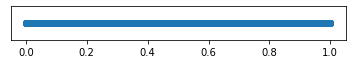

In [4]:
# ==========================================
# mesh
mesh = IntervalMesh(nel, xmin, xmax)

plot(mesh)

class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], xmin, 1.e-14) and on_boundary
class Right(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], xmax, 1.e-14) and on_boundary

    

In [5]:
# =========================================
# function space
V1D = FiniteElement('CG',mesh.ufl_cell(),p_order)
# u1 and u2 for the bot and top layers
V   = FunctionSpace(mesh,MixedElement(V1D,V1D))

In [6]:
# This imposes a Dirichlet condition at the point x=0
def Dirichlet_x0_boundary(x,on_boundary):
    tol = 1e-14
    return abs(x[0]-xmin)<tol

# This imposes a Dirichlet condition at the point x=1
def Dirichlet_x1_boundary(x,on_boundary):
    tol = 1e-14
    return abs(x[0]-xmax)<tol

In [7]:
# Enforce u1=0,u2=0 at x=0
#         u1=d      at x=1
# ---------------------------------------
bcs = [DirichletBC(V.sub(0), Constant(0),        Dirichlet_x0_boundary),
       DirichletBC(V.sub(1), Constant(0),        Dirichlet_x0_boundary),
       DirichletBC(V.sub(0), Constant(d_NonDim), Dirichlet_x1_boundary)]

In [8]:
# weak form
# ---------------------------------------
def strain(v):
    return grad(v)[0]

# Define variational problem
du1, du2 = TestFunction(V)
uvec = Function(V)
u1, u2 = split(uvec)

# weak form
F = inner(strain(u1),strain(du1))*dx + \
    (1/d_NonDim)*(fe_NonDim)*(1/wl_NonDim)*sin(2*pi/wl_NonDim*d_NonDim*(u1-u2))*du1*dx + \
    inner(strain(u2),strain(du2))*dx - \
    (1/d_NonDim)*(fe_NonDim)*(1/wl_NonDim)*sin(2*pi/wl_NonDim*d_NonDim*(u1-u2))*du2*dx

J = derivative(F, uvec)
problem = NonlinearVariationalProblem(F, uvec, bcs, J)
solver  = NonlinearVariationalSolver(problem)


In [9]:
prm = solver.parameters
# prm['newton_solver']['absolute_tolerance'] = 1E-8
# prm['newton_solver']['relative_tolerance'] = 4E-8
# prm['newton_solver']['relative_tolerance'] = 1E-6
# prm['newton_solver']['maximum_iterations'] = 600
# prm['newton_solver']['relaxation_parameter'] = 0.5
solver.solve()

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to solve nonlinear system with NewtonSolver.
*** Reason:  Newton solver did not converge because maximum number of iterations reached.
*** Where:   This error was encountered inside NewtonSolver.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  74d7efe1e84d65e9433fd96c50f1d278fa3e3f3f
*** -------------------------------------------------------------------------


In [ ]:
# check
# ------------------------------
plt.figure()
plot(u1)
plot(u2)

In [ ]:
# strain
# ------------------------------
plt.figure()
plot(strain(u2))

In [ ]:
# strain
# ------------------------------
plt.figure()
plot(strain(u1))

In [ ]:
# check
# ------------------------------
plt.figure()
plot(strain(u1-u2))